In [1]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [2]:
mv kaggle.json ~/.kaggle/

mv: cannot stat 'kaggle.json': No such file or directory


In [3]:
! kaggle competitions download -c dogs-vs-cats

 98% 798M/812M [00:03<00:00, 246MB/s]
100% 812M/812M [00:03<00:00, 229MB/s]


In [4]:
! unzip dogs-vs-cats.zip

Archive:  dogs-vs-cats.zip
  inflating: sampleSubmission.csv    
  inflating: test1.zip               
  inflating: train.zip               


In [5]:
! unzip -qq train.zip

replace train/cat.0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace train/cat.1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace train/cat.10.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [6]:
!ls /content/train | wc -l

25000


In [7]:
import os, shutil

In [8]:
# The path to the directory where the original
# dataset was uncompressed
original_dataset_dir = '/content/train'

# The directory where we will
# store our smaller dataset
base_dir = '/content/subset'
os.makedirs(base_dir, exist_ok=True)

In [9]:
# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
#os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
#os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
#os.mkdir(test_dir)

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
#os.mkdir(train_cats_dir)

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
#os.mkdir(train_dogs_dir)

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
#os.mkdir(validation_cats_dir)

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
#os.mkdir(validation_dogs_dir)

# Directory with our validation cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
#os.mkdir(test_cats_dir)

# Directory with our validation dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
#os.mkdir(test_dogs_dir)

# Copy first 1000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

# Copy first 1000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 500 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 500 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [10]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [11]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [12]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(),
              metrics=['accuracy'])

In [13]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [14]:
print(type(next(train_generator)))
data , label = next(train_generator)
#print(data,label)

<class 'tuple'>


In [15]:
data.shape

(20, 150, 150, 3)

In [16]:
label.shape

(20,)

In [17]:
label

array([0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       1., 1., 1.], dtype=float32)

In [18]:
history = model.fit(
      train_generator,
      epochs=30,
      validation_data=validation_generator)

Epoch 1/30
100/100 [==============================] - 14s 56ms/step - loss: 0.7089 - accuracy: 0.5790 - val_loss: 0.9878 - val_accuracy: 0.5000
Epoch 2/30
100/100 [==============================] - 6s 63ms/step - loss: 0.6706 - accuracy: 0.6140 - val_loss: 0.9680 - val_accuracy: 0.5000
Epoch 3/30
100/100 [==============================] - 7s 72ms/step - loss: 0.6398 - accuracy: 0.6410 - val_loss: 1.1141 - val_accuracy: 0.4980
Epoch 4/30
100/100 [==============================] - 5s 52ms/step - loss: 0.6244 - accuracy: 0.6560 - val_loss: 0.8458 - val_accuracy: 0.5220
Epoch 5/30
100/100 [==============================] - 6s 62ms/step - loss: 0.6075 - accuracy: 0.6735 - val_loss: 0.8521 - val_accuracy: 0.5280
Epoch 6/30
100/100 [==============================] - 6s 59ms/step - loss: 0.5680 - accuracy: 0.6975 - val_loss: 0.6757 - val_accuracy: 0.5980
Epoch 7/30
100/100 [==============================] - 5s 52ms/step - loss: 0.5688 - accuracy: 0.7170 - val_loss: 0.6015 - val_accuracy: 0.677

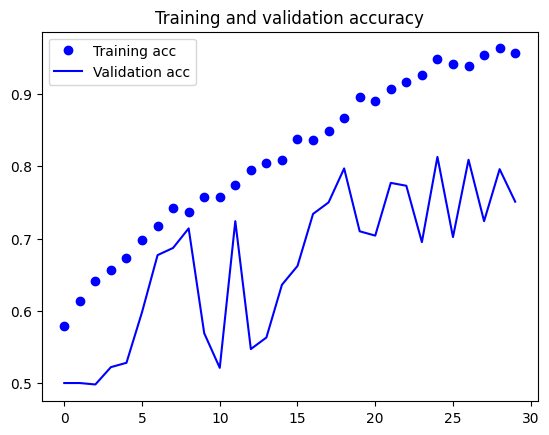

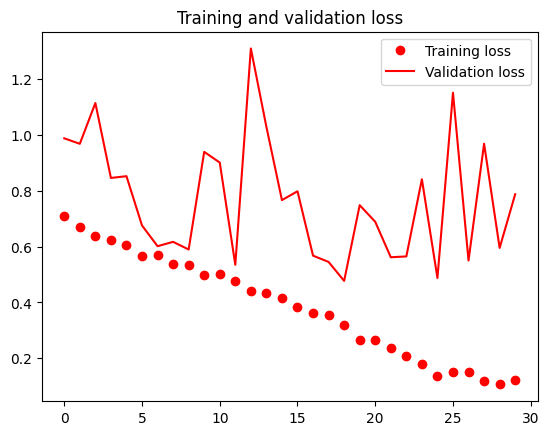

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [20]:
model.save('cats_and_dogs_without_Data_Augmentation')

# Data Augmentation

In [21]:
datagen = ImageDataGenerator(

                             rotation_range = 40,
                             width_shift_range = 0.3,
                             height_shift_range= 0.3,
                             shear_range= 0.3,
                             zoom_range = 0.3,
                             horizontal_flip= True,
                             vertical_flip= True,
                             fill_mode='nearest'
                )

In [22]:
import keras.utils as image
fnames = [os.path.join(train_cats_dir,fname) for fname in os.listdir(train_cats_dir)]

In [23]:
fnames[:4]

['/content/subset/train/cats/cat.655.jpg',
 '/content/subset/train/cats/cat.908.jpg',
 '/content/subset/train/cats/cat.333.jpg',
 '/content/subset/train/cats/cat.625.jpg']

:

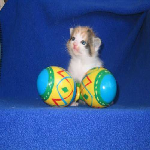

In [24]:
img = image.load_img('/content/subset/train/cats/cat.235.jpg',target_size=(150,150))
img

In [25]:
x = image.img_to_array(img)
x.shape

(150, 150, 3)

In [26]:
x = x.reshape(1,150,150,3)
x.shape

(1, 150, 150, 3)

In [27]:
dg = datagen.flow(x,batch_size=1)

In [28]:
next(dg).shape

(1, 150, 150, 3)

For Manipulate with your photos to see how data Augmentaion works

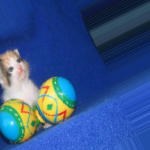

In [29]:
image.array_to_img(next(dg)[0])

 See how the matris of the 5 first pixels change for a Sample

In [30]:
next(dg)[0][:5,:5,0]

array([[16.566141 , 16.341179 , 19.079796 , 17.661322 , 17.10131  ],
       [16.27091  , 17.781837 , 18.833439 , 16.540977 , 15.560389 ],
       [16.438904 , 17.815279 , 18.12667  , 17.016798 , 15.6073475],
       [16.92714  , 15.891947 , 20.7673   , 17.793962 , 17.888887 ],
       [17.324734 , 20.375229 , 21.529943 , 18.803682 , 17.67427  ]],
      dtype=float32)

In [31]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range= 0.2,
    shear_range= 0.2,
    zoom_range = 0.2,
    horizontal_flip= True,
    vertical_flip= True,
     fill_mode='nearest'


)

# for test data just rescale it becuase we just wanna TEST it for model and dont lean any new things
test_dategen = ImageDataGenerator(
    rescale = 1./255
)

In [32]:
train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [33]:
history2 = model.fit(
      train_generator,
      epochs=30,
      validation_data=validation_generator)

Epoch 1/30
100/100 [==============================] - 17s 169ms/step - loss: 0.5509 - accuracy: 0.7650 - val_loss: 0.4352 - val_accuracy: 0.7970
Epoch 2/30
100/100 [==============================] - 16s 165ms/step - loss: 0.4761 - accuracy: 0.7685 - val_loss: 0.4541 - val_accuracy: 0.7820
Epoch 3/30
100/100 [==============================] - 16s 165ms/step - loss: 0.4496 - accuracy: 0.8055 - val_loss: 0.4745 - val_accuracy: 0.7670
Epoch 4/30
100/100 [==============================] - 17s 173ms/step - loss: 0.4544 - accuracy: 0.7975 - val_loss: 0.4889 - val_accuracy: 0.7870
Epoch 5/30
100/100 [==============================] - 17s 173ms/step - loss: 0.4304 - accuracy: 0.7975 - val_loss: 0.4825 - val_accuracy: 0.7720
Epoch 6/30
100/100 [==============================] - 16s 164ms/step - loss: 0.4304 - accuracy: 0.7950 - val_loss: 0.5260 - val_accuracy: 0.7530
Epoch 7/30
100/100 [==============================] - 16s 164ms/step - loss: 0.4277 - accuracy: 0.8025 - val_loss: 0.4850 - val_ac

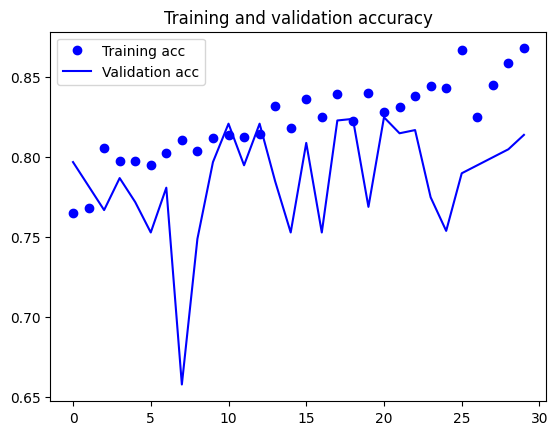

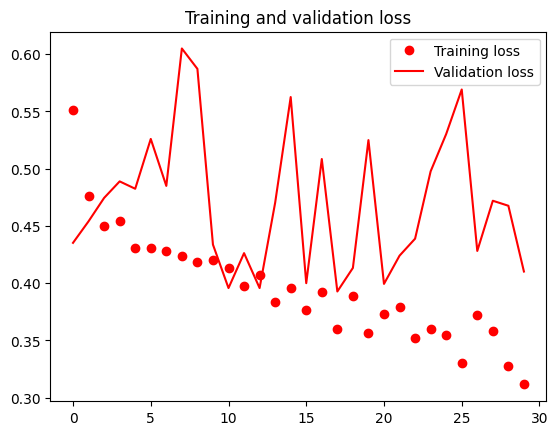

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()


plt.show()